In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math

In [2]:
df = pd.read_csv('final_todas_las_actas_1_903108.csv', encoding = "ISO-8859-1")

C:\Users\abadc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.columns

Index(['mesa_numero', 'copia_numero', 'departamento', 'provincia', 'distrito',
       'local_de_votacion', 'direccion', 'electores_habiles', 'total_votantes',
       'estados_del_acta', 'votos_para_pedro_castillo',
       'votos_para_keiko_fujimori', 'votos_en_blanco', 'votos_nulos',
       'votos_impugnados', 'total_votos_emitidos'],
      dtype='object')

In [4]:
df_distrito = df.groupby('distrito').votos_para_keiko_fujimori.sum()

In [5]:
df_distrito_con_votos = df_distrito[df_distrito != 0] #Distritos con al menos 1 voto

In [6]:
# Crear un diccionario con los primeros dígitos
diccionario_digitos = dict()

In [7]:
for i in df_distrito_con_votos:
    if str(i)[0] in diccionario_digitos.keys():
        diccionario_digitos[str(i)[0]] += 1
    else:
        diccionario_digitos[str(i)[0]] = 0

In [8]:
print(diccionario_digitos)

{'8': 84, '3': 249, '1': 565, '7': 109, '6': 117, '5': 166, '4': 183, '2': 319, '9': 108}


In [9]:
benford = pd.DataFrame(diccionario_digitos.items(), columns= ['digito', 'total'], index = diccionario_digitos.keys())

In [10]:
benford = benford.sort_values(by='digito')

In [11]:
benford

,digito,total
1,1,565
2,2,319
3,3,249
4,4,183
5,5,166
6,6,117
7,7,109
8,8,84
9,9,108


In [12]:
benford_real = pd.DataFrame([round(math.log10(1+1/i)*100,2) for i in range(1,10)], index=['1','2','3','4','5','6','7','8','9'], columns=['Valor real de Benford'])

In [13]:
benford_real

,Valor real de Benford
1,30.10
2,17.61
3,12.49
4,9.69
5,7.92
6,6.69
7,5.80
8,5.12
9,4.58


In [14]:
benford['porcentaje_total'] = round(benford['total']*100/sum(benford['total']), 2)

In [15]:
#benford['real'] = [round(math.log10(1+1/i)*100,2) for i in range(1,10)]

In [16]:
print(benford)

  digito  total  porcentaje_total
1      1    565             29.74
2      2    319             16.79
3      3    249             13.11
4      4    183              9.63
5      5    166              8.74
6      6    117              6.16
7      7    109              5.74
8      8     84              4.42
9      9    108              5.68


[(0.0, 35.0)]

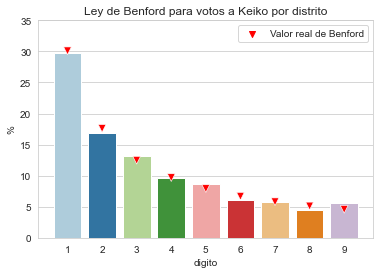

In [18]:
sns.set_style('whitegrid')
sns.barplot(data=benford, x= 'digito', y='porcentaje_total', palette='Paired')
g =sns.scatterplot(data=benford_real, color='b', s=60, zorder=10, markers='v', palette=['red'])

g.set(title='Ley de Benford para votos a Keiko por distrito')
g.set(ylabel = '%')
g.set(ylim=(0, 35))
